In [54]:
import sys, time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
palette = 'magma_r'
%matplotlib inline

# Step 1. 1D linear convection

The following partial differential equation (PDE) describes a wave propagating (convecting) in one spatial dimension. It is the simplest model of fluid dynamics.

$
\begin{align}
\frac{\delta u}{\delta t} + c \frac{\delta u}{\delta x} &= 0
\end{align}
$

This equation defines an *implicit function* $u(t, x)$ in terms of its partial derivatives with respect to space and time, which happen to be linearly related. There is an analytic solution for this particular PDE, but that's not always the case for more complex PDEs.

Here are the definitions of the partial derivatives:

$
\begin{align}
\frac{\delta u}{\delta t} &= \lim_{\Delta t \to 0} \frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} \\
\frac{\delta u}{\delta x} &= \lim_{\Delta x \to 0} \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x}
\end{align}
$

The finite difference method computes a numerical solution to a PDE by assuming that we can approximate the derivatives by using small values for $\Delta t$ and $\Delta x$ instead of letting them go all the way to zero. In other words, we discretize space and time to a grid, then compute the solution iteratively over multiple steps through time and space based on previous values.

In the equation for 1D linear convection, we can replace the partial derivatives with the following approximations, where $\Delta t$ and $\Delta x$ are some small finite values:

$
\begin{align}
\frac{\delta u}{\delta t} &\approx \frac{u(t + \Delta t, x) - u(t,x)}{\Delta t} \\
\frac{\delta u}{\delta x} &\approx \frac{u(t, x + \Delta x) - u(t,x)}{\Delta x}
\end{align}
$

By substituting these into the first equation, we can derive an approximation of $u(t,x)$ in terms of its values at previous points in time:

$
\begin{align}
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} + c \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} &= 0 \\
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} &= - c \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} \\
u(t + \Delta t,x) - u(t,x) &= - c [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
u(t + \Delta t,x) &= u(t,x) - c [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
\end{align}
$

We can make this recurrent computation explicit by letting $u_{n,i}$ equal the value of $u(t, x)$ at some time $t=n \Delta t$ and spatial point $x=i \Delta x$. Then we can write the equation as a *finite difference solver*:

$
\begin{align}
u_{n+1,i} &= u_{n,i} - c(u_{n,i} - u_{n,i-1}) \frac{\Delta t}{\Delta x}
\end{align}
$

Note that we have chosen to compute this numerical solution using *forward differences* in time and *backward differences* in space. Then we only need to set some initial conditions $u(0, x) = u_0(x)$ and discretization parameters $\Delta x$ and $\Delta t$, and we can compute an approximate solution to the PDE.

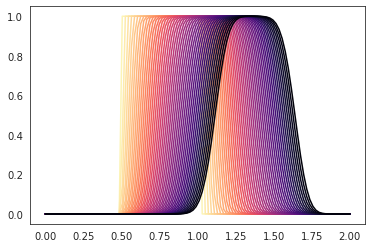

In [125]:
# 1D linear convection
n_t = 50
n_x = 100
dt = 0.05
dx = 0.02
c = 0.25 # the wave speed

sns.set_palette(palette, n_t)

# use a square wave as the initial conditions
u = np.zeros((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 1
plt.plot(np.linspace(0, n_x*dx, n_x), u[0])

# propagate through finite differences
for n in range(1, n_t):
    u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
    plt.plot(np.linspace(0, n_x*dx, n_x), u[n])

# Step 2. 1D nonlinear convection

The previous convection model assumed a linear relationship between the time and space derivatives. We can extend this to *nonlinear* convection, where the partial derivatives are related through the implicit function $u$ itself:

$
\begin{align}
\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} &= 0
\end{align}
$

The process for deriving the finite difference solver for this equation is exactly the same as in step 1. We simply substitute the definitions of the derivatives, and rearrange:

$
\begin{align}
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} + u \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} &= 0 \\
\frac{u(t + \Delta t,x) - u(t,x)}{\Delta t} &= - u \frac{u(t,x + \Delta x) - u(t,x)}{\Delta x} \\
u(t + \Delta t,x) - u(t,x) &= - u [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
u(t + \Delta t,x) &= u(t,x) - u [u(t,x + \Delta x) - u(t,x)]\frac{\Delta t}{\Delta x} \\
\end{align}
$

Then we turn this into a recurrent computation of $u$ in terms of previous points in time and space.

$
\begin{align}
u_{n+1,i} &= u_{n,i} - u_{n,i} (u_{n,i} - u_{n,i-1}) \frac{\Delta t}{\Delta x}
\end{align}
$

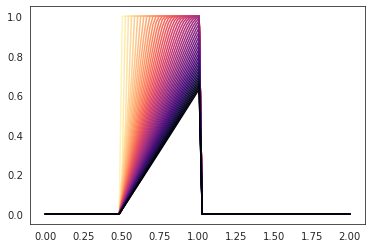

In [134]:
# 1D nonlinear convection
n_t = 50
n_x = 100
dt = 0.015
dx = 0.02
c = 0.25 # the wave speed

sns.set_palette(palette, n_t)

# initial conditions
u = np.zeros((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 1
plt.plot(np.linspace(0, n_x*dx, n_x), u[0])

# finite differences
for n in range(1, n_t):
    u[n,1:] = u[n-1,1:] - u[n-1,1:] * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
    plt.plot(np.linspace(0, n_x*dx, n_x), u[n])

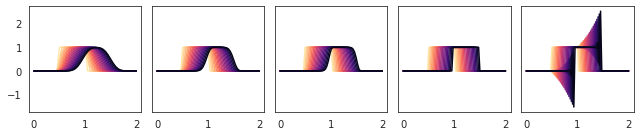

In [61]:
# experiment with grid size

def linear_convect(n_x, ax):
    dx = 2 / (n_x - 1)
    n_t = 20
    dt = 0.025
    c = 1

    sns.set_palette(palette, n_t)

    # initial conditions
    u = np.zeros((n_t, n_x))
    u[0,int(0.5/dx):int(1/dx+1)] = 1
    ax.plot(np.linspace(0, 2, n_x), u[0])

    # finite differences
    for n in range(1, n_t):
        u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
        ax.plot(np.linspace(0, 2, n_x), u[n])

fig, axes = plt.subplots(1, 5, figsize=(9,2), sharey=True)
linear_convect(41, axes[0])
linear_convect(61, axes[1])
linear_convect(71, axes[2])
linear_convect(81, axes[3])
linear_convect(85, axes[4])
fig.tight_layout()

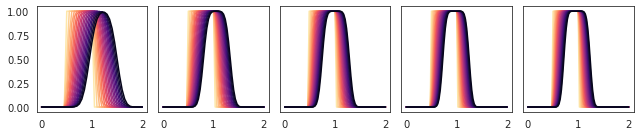

In [62]:
# use Courant number to ensure stability
def linear_convect(n_x, ax):
    dx = 2 / (n_x - 1)
    n_t = 20
    c = 1
    sigma = 0.5 # how do you determine this?
    dt = sigma * dx / c

    sns.set_palette(palette, n_t)

    # initial conditions
    u = np.zeros((n_t, n_x))
    u[0,int(0.5/dx):int(1/dx+1)] = 1
    ax.plot(np.linspace(0, 2, n_x), u[0])

    # finite differences
    for n in range(1, n_t):
        u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
        ax.plot(np.linspace(0, 2, n_x), u[n])

fig, axes = plt.subplots(1, 5, figsize=(9,2), sharey=True)
linear_convect(41, axes[0])
linear_convect(61, axes[1])
linear_convect(71, axes[2])
linear_convect(81, axes[3])
linear_convect(85, axes[4])
fig.tight_layout()

# Step 3. 1D diffusion

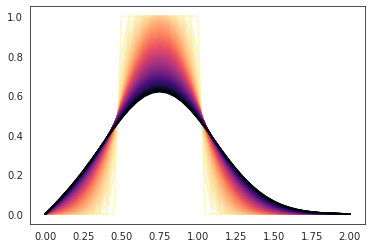

In [64]:
# 1D diffusion
n_x = 41
dx = 2 / (n_x - 1)
n_t = 100

nu = 0.3 # viscosity parameter
sigma = .2 # sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu

sns.set_palette(palette, n_t)

# initial conditions
u = np.zeros((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 1
plt.plot(np.linspace(0, 2, n_x), u[0])

# finite differences
for n in range(1, n_t):
    u[n,1:-1] = u[n-1,1:-1] + nu * (u[n-1,2:] + u[n-1,:-2] - 2*u[n-1,1:-1] ) * dt/dx**2
    plt.plot(np.linspace(0, 2, n_x), u[n])

# Step 4. Burger's equation

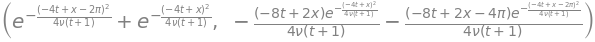

In [65]:
# Burgers' equation
import sympy
sympy.init_printing(use_latex=True)

x, nu, t = sympy.symbols('x nu t')
phi = (
    sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + 
    sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1)))
)
phi_prime = phi.diff(x)

u = -2*nu*(phi_prime / phi) + 4
u_func = sympy.utilities.lambdify((t, x, nu), u)
phi, phi_prime

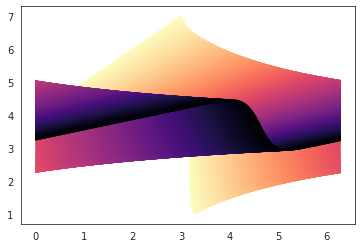

In [66]:
n_x = 101
n_t = 500
dx = 2 * np.pi / (n_x - 1)
nu = 0.07
dt = dx * nu

sns.set_palette(palette, n_t)

# initial conditions
x = np.linspace(0, 2*np.pi, n_x)
u = np.zeros((n_t, n_x))
u[0] = [u_func(0, x0, nu) for x0 in x]
plt.plot(x, u[0])

# finite differences
for n in range(1, n_t):
    i = np.arange(n_x)
    u[n,:] = (
        u[n-1] -
        u[n-1] * (u[n-1] - u[n-1,(i-1)%n_x]) * dt/dx +
        nu * (u[n-1,(i+1)%n_x] + u[n-1,(i-1)%n_x] - 2*u[n-1,:] ) * dt/dx**2
    )
    plt.plot(x, u[n])